# <center> <u> Put Call Parity </u> </center> 

In [1]:
import numpy as np
import pandas as pd 
import yfinance as yf
from datetime import datetime

from numba import jit, prange

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression

## <center> Set Seaborn Theme </center>

In [2]:
sns.set_theme(
    style = "darkgrid",
    palette = "bright",
)

plt.rc('figure', figsize = (10, 5))

## <center> Fetch Data from Yahoo Finance </center> 

In [3]:
SPX = yf.Ticker("^SPX")

In [4]:
SPX.history(period = "1d")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-10-13 00:00:00-04:00,4360.490234,4377.100098,4311.970215,4327.779785,0,0.0,0.0


In [5]:
last_close = SPX.history(period = "1d")["Close"]

In [6]:
expirations = SPX.options
chain = expirations[5]
chain

'2023-10-23'

In [7]:
opt = SPX.option_chain(date = chain)
calls = opt.calls
puts = opt.puts

In [8]:
def get_dte(oc):
    """
    
    """
    today = datetime.today()
    expiry = datetime.strptime(oc, '%Y-%m-%d')
    dte =  (expiry - today).days
    
    return dte

In [9]:
dte = []
for e in expirations:
    dte.append(get_dte(e))

## <center> Call DataFrame </center> 

In [10]:
calls.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW231023C03500000,2023-10-11 15:00:33+00:00,3500.0,874.53,822.8,829.3,0.0,0.0,1.0,1,0.567875,True,REGULAR,USD
1,SPXW231023C03600000,2023-09-25 15:01:30+00:00,3600.0,722.37,723.5,730.0,0.0,0.0,NaN,1,0.528813,True,REGULAR,USD
2,SPXW231023C03850000,2023-10-11 16:15:25+00:00,3850.0,511.59,474.2,480.6,0.0,0.0,1.0,1,0.372687,True,REGULAR,USD
3,SPXW231023C03900000,2023-10-11 15:41:26+00:00,3900.0,463.95,424.4,430.8,0.0,0.0,1.0,1,0.341987,True,REGULAR,USD
4,SPXW231023C03950000,2023-10-02 16:56:01+00:00,3950.0,328.70,374.8,381.1,0.0,0.0,10.0,10,0.312232,True,REGULAR,USD


In [11]:
calls.tail()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
87,SPXW231023C04650000,2023-10-13 18:46:13+00:00,4650.0,0.15,0.00,0.15,0.05,50.000008,25.0,167,0.163583,False,REGULAR,USD
88,SPXW231023C04700000,2023-10-10 19:56:32+00:00,4700.0,0.15,0.05,0.15,0.00,0.000000,21.0,32,0.185067,False,REGULAR,USD
89,SPXW231023C04800000,2023-10-05 13:40:00+00:00,4800.0,0.08,0.00,0.15,0.00,0.000000,3.0,27,0.226814,False,REGULAR,USD
90,SPXW231023C04900000,2023-10-10 15:23:26+00:00,4900.0,0.05,0.00,0.15,0.00,0.000000,2.0,26,0.267097,False,REGULAR,USD
91,SPXW231023C05200000,2023-09-18 17:49:38+00:00,5200.0,0.05,0.00,0.10,0.00,0.000000,NaN,6,0.366217,False,REGULAR,USD


## <center> Put DataFrame </center> 

In [12]:
puts.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW231023P02200000,2023-10-06 13:33:11+00:00,2200.0,0.05,0.00,0.10,0.00,0.0,200.0,305,1.197270,False,REGULAR,USD
1,SPXW231023P02400000,2023-10-06 15:37:34+00:00,2400.0,0.05,0.00,0.10,0.00,0.0,24.0,24,1.050786,False,REGULAR,USD
2,SPXW231023P02600000,2023-10-13 18:55:21+00:00,2600.0,0.10,0.00,0.15,0.05,100.0,376.0,37,0.941407,False,REGULAR,USD
3,SPXW231023P02800000,2023-10-13 18:57:48+00:00,2800.0,0.16,0.05,0.20,0.11,220.0,387.0,192,0.845705,False,REGULAR,USD
4,SPXW231023P03000000,2023-10-13 18:55:21+00:00,3000.0,0.29,0.10,0.30,0.19,190.0,376.0,228,0.749026,False,REGULAR,USD


In [13]:
puts.tail()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
121,SPXW231023P04550000,2023-10-13 19:04:37+00:00,4550.0,213.20,220.4,226.9,12.080002,6.006365,9.0,34,0.205284,True,REGULAR,USD
122,SPXW231023P04575000,2023-10-09 19:10:21+00:00,4575.0,229.00,245.4,251.8,0.000000,0.000000,11.0,13,0.221230,True,REGULAR,USD
123,SPXW231023P04600000,2023-10-11 14:36:58+00:00,4600.0,232.13,270.3,276.8,0.000000,0.000000,2.0,25,0.237831,True,REGULAR,USD
124,SPXW231023P04700000,2023-09-20 20:08:50+00:00,4700.0,282.43,369.8,376.2,0.000000,0.000000,NaN,1,0.293067,True,REGULAR,USD
125,SPXW231023P04800000,2023-09-19 13:41:50+00:00,4800.0,333.19,469.9,476.4,0.000000,0.000000,NaN,3,0.354895,True,REGULAR,USD


## <center> Join DataFrame by Strike </center> 

In [14]:
join_df = pd.merge(left = calls, right = puts, how = "inner", left_on = ["strike"], right_on = ["strike"])

In [15]:
join_df.head()

,contractSymbol_x,lastTradeDate_x,strike,lastPrice_x,bid_x,ask_x,change_x,percentChange_x,volume_x,openInterest_x,...,bid_y,ask_y,change_y,percentChange_y,volume_y,openInterest_y,impliedVolatility_y,inTheMoney_y,contractSize_y,currency_y
0,SPXW231023C03500000,2023-10-11 15:00:33+00:00,3500.0,874.53,822.8,829.3,0.0,0.0,1.0,1,...,0.70,0.90,0.38,76.000000,1140.0,830,0.524419,False,REGULAR,USD
1,SPXW231023C03600000,2023-09-25 15:01:30+00:00,3600.0,722.37,723.5,730.0,0.0,0.0,NaN,1,...,0.90,1.10,0.25,31.249990,579.0,4203,0.480596,False,REGULAR,USD
2,SPXW231023C03850000,2023-10-11 16:15:25+00:00,3850.0,511.59,474.2,480.6,0.0,0.0,1.0,1,...,1.60,1.80,1.15,135.294110,11.0,264,0.346930,False,REGULAR,USD
3,SPXW231023C03900000,2023-10-11 15:41:26+00:00,3900.0,463.95,424.4,430.8,0.0,0.0,1.0,1,...,1.75,2.00,1.05,110.526310,171.0,242,0.319282,False,REGULAR,USD
4,SPXW231023C03950000,2023-10-02 16:56:01+00:00,3950.0,328.70,374.8,381.1,0.0,0.0,10.0,10,...,2.00,2.25,0.83,68.032776,50.0,163,0.291633,False,REGULAR,USD


In [16]:
join_df.tail()

,contractSymbol_x,lastTradeDate_x,strike,lastPrice_x,bid_x,ask_x,change_x,percentChange_x,volume_x,openInterest_x,...,bid_y,ask_y,change_y,percentChange_y,volume_y,openInterest_y,impliedVolatility_y,inTheMoney_y,contractSize_y,currency_y
81,SPXW231023C04550000,2023-10-13 20:02:31+00:00,4550.0,0.15,0.10,0.30,-0.15,-50.000000,63.0,465,...,220.4,226.9,12.080002,6.006365,9.0,34,0.205284,True,REGULAR,USD
82,SPXW231023C04575000,2023-10-13 18:46:18+00:00,4575.0,0.25,0.05,0.20,0.05,24.999998,21.0,128,...,245.4,251.8,0.000000,0.000000,11.0,13,0.221230,True,REGULAR,USD
83,SPXW231023C04600000,2023-10-13 18:28:59+00:00,4600.0,0.20,0.00,0.20,0.00,0.000000,1.0,128,...,270.3,276.8,0.000000,0.000000,2.0,25,0.237831,True,REGULAR,USD
84,SPXW231023C04700000,2023-10-10 19:56:32+00:00,4700.0,0.15,0.05,0.15,0.00,0.000000,21.0,32,...,369.8,376.2,0.000000,0.000000,NaN,1,0.293067,True,REGULAR,USD
85,SPXW231023C04800000,2023-10-05 13:40:00+00:00,4800.0,0.08,0.00,0.15,0.00,0.000000,3.0,27,...,469.9,476.4,0.000000,0.000000,NaN,3,0.354895,True,REGULAR,USD


## <center> Filter with List Comprehension </center> 

In [17]:
df = join_df[(3500 < join_df["strike"]) & (join_df["strike"] < 5500)]

## <center> Volatility Curve </center> 

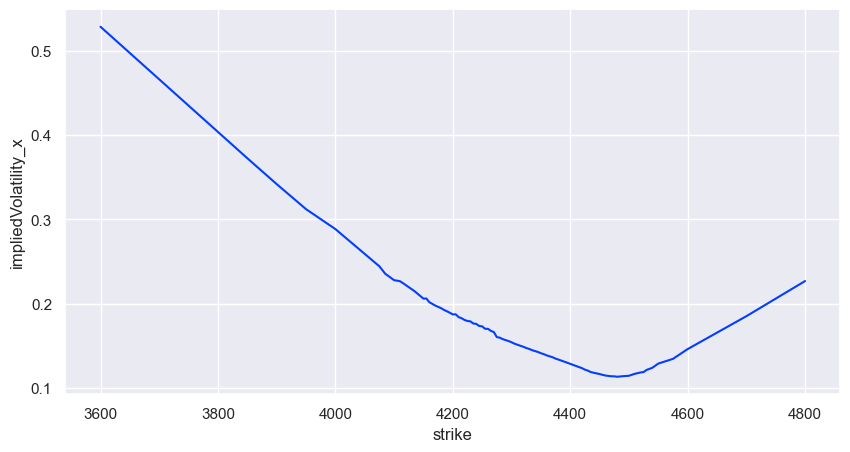

In [18]:
ax = sns.lineplot(
    x = df["strike"],
    y = df["impliedVolatility_x"],
)

plt.show()

## <center> Option Prices </center> 

In [19]:
call_mid = ((df["bid_x"] + df["ask_x"]) / 2)
put_mid = ((df["bid_y"] + df["ask_y"]) / 2)

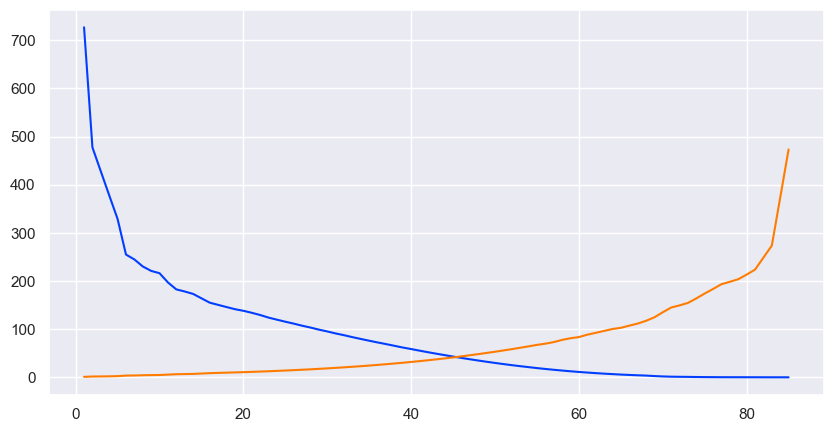

In [20]:
ax = sns.lineplot(call_mid)

sns.lineplot(put_mid)

plt.show()

## <center> Put Call Parity </center> 

## <center> $ C(t) - P(t) = S(t) - Ke^{-rT} $ </center> 

In [21]:
parity_spread = ((df["bid_x"] + df["ask_x"]) / 2) - ((df["bid_y"] + df["ask_y"]) / 2)

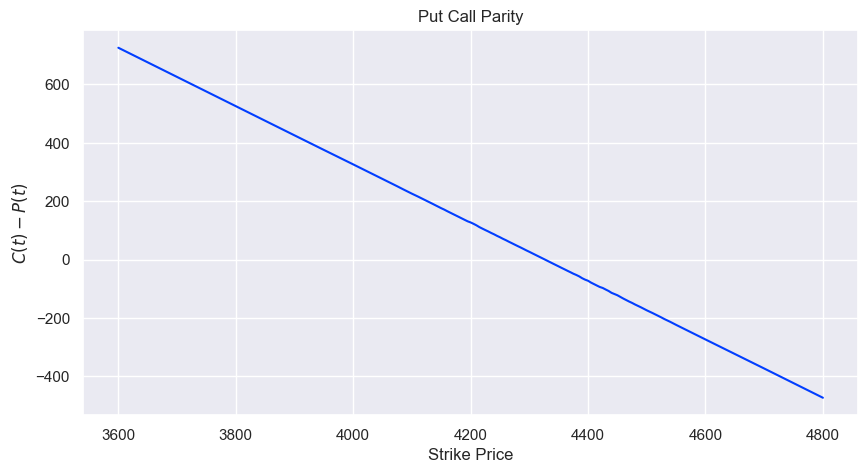

In [22]:
ax = sns.lineplot(
    x = df["strike"],
    y = parity_spread,
)

ax.set(
    title = "Put Call Parity",
    xlabel = "Strike Price",
    ylabel = "$ C(t) - P(t) $"
)

plt.show()

## <center> $ y_{i} = \alpha + X \beta $ </center>

In [23]:
X = df["strike"].to_numpy().reshape(-1, 1)
y = parity_spread

model = LinearRegression().fit(X, y)

In [24]:
model.score(X, y)

0.9999950155340193

In [25]:
alpha = model.intercept_
alpha

4320.810943322175

In [26]:
beta = -model.coef_[0]
beta

0.9986493750884448

In [27]:
@jit(nopython = True)
def f(x):
    
    return np.exp(-x)

In [28]:
def bisection_method(root):
    """
    
    """
    
    a = 0
    b = 1
    c = (a + b) / 2
    fc = f(c)
    
    err_tol = 1e-7
    itr = 0
    max_itr = 100
    
    while np.abs(fc - root) > err_tol and itr < max_itr:
        
        if fc > root:
            a = c
            c = (a + b) / 2
            
        if fc < root:
            b = c
            c = (a + b) / 2
            
        fc = f(c)
        itr += 1
    
    return c

In [29]:
interest_rate = bisection_method(beta)
interest_rate * (365 / get_dte(expirations[5])) * 100

6.1666518449783325

In [30]:
def get_box_spread_rates():
    """
    
    """
    ticker = yf.Ticker("^SPX")
    expirations = ticker.options

    risk_free_yields = {}
    
    for i, expiry in enumerate(expirations): 
        dte = get_dte(expiry)
        
        if (1 < dte < 365):
            tmp_data = {}
            opt = ticker.option_chain(date = expiry)

            join_df = pd.merge(left = opt.calls, right = opt.puts, how = "inner", left_on = ["strike"], right_on = ["strike"])
            df = join_df[(3500 < join_df["strike"]) & (join_df["strike"] < 5500)]

            if len(df) > 20:
                call_mid = ((df["bid_x"] + df["ask_x"]) / 2)
                put_mid = ((df["bid_y"] + df["ask_y"]) / 2)

                parity_spread = ((df["bid_x"] + df["ask_x"]) / 2) - ((df["bid_y"] + df["ask_y"]) / 2)

                X = df["strike"].to_numpy().reshape(-1, 1)
                y = parity_spread
                model = LinearRegression().fit(X, y)

                alpha = model.intercept_
                beta = np.abs(model.coef_[0])
                interest_rate = bisection_method(beta) * (365 / dte) * 100
                
                tmp_data["Score"] = model.score(X, y)
                tmp_data["Interest Rate"] = interest_rate
                risk_free_yields[expiry] = tmp_data
        
    return risk_free_yields

In [31]:
yields = get_box_spread_rates()

In [32]:
yields_df = pd.DataFrame.from_dict(yields).T
display(yields_df)

,Score,Interest Rate
2023-10-17,0.999995,11.530519
2023-10-18,0.999740,50.014893
2023-10-19,0.999996,6.098121
2023-10-20,0.719618,2276.258373
2023-10-23,0.999995,6.166652
2023-10-24,0.999997,5.322893
2023-10-25,0.999996,4.312414
2023-10-26,0.999998,5.325003
2023-10-27,0.999879,7.106498
2023-10-30,0.999995,4.826864


In [33]:
filtered_yield_df = yields_df[yields_df["Score"] >= 0.99999]
display(filtered_yield_df)

,Score,Interest Rate
2023-10-17,0.999995,11.530519
2023-10-19,0.999996,6.098121
2023-10-23,0.999995,6.166652
2023-10-24,0.999997,5.322893
2023-10-25,0.999996,4.312414
2023-10-26,0.999998,5.325003
2023-10-30,0.999995,4.826864
2023-11-01,0.999997,4.403865
2023-11-02,0.999998,5.178097
2023-11-06,0.999998,4.693692


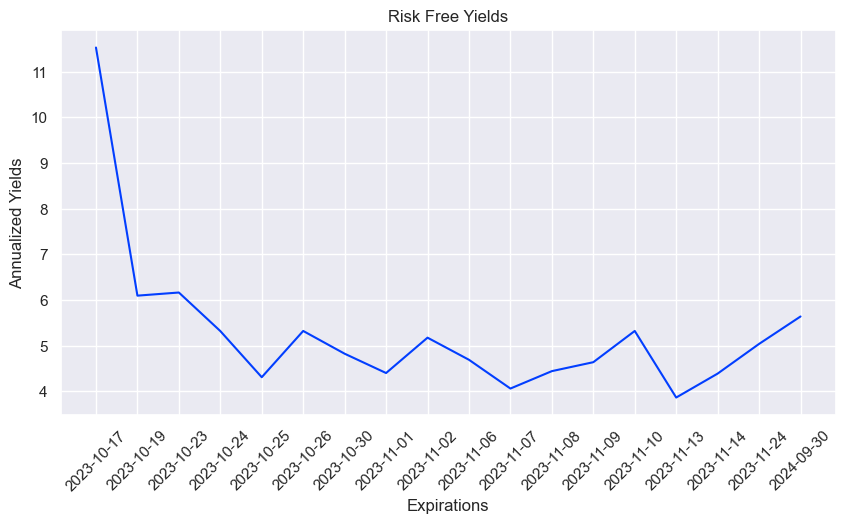

In [34]:
ax = sns.lineplot(
    filtered_yield_df["Interest Rate"],
)

ax.set(
    title = "Risk Free Yields",
    xlabel = "Expirations",
    ylabel = "Annualized Yields",
)

plt.xticks(rotation = 45)
plt.show()